# KNAP2 gene analysis
*Example from statomics* Data from https://doi.org/10.1093/jnci/djj052

Histologic grade in breast cancer provides clinically important prognostic information. Researchers examined whether histologic grade was associated with gene expression profiles of breast cancers and whether such profiles could be used to improve histologic grading. In this tutorial we will assess the impact of histologic grade on expression of the KPNA2 gene that is known to be associated with poor BC prognosis. The patients, however, do not only differ in the histologic grade, but also on their lymph node status. The lymph nodes were not affected (0) or surgically removed (1).

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.compat import urlopen

try:
    gene_table = pd.read_csv('brc.txt')
except:  # recent pandas can read URL without urlopen
    url = 'https://raw.githubusercontent.com/statOmics/statisticalGenomicsCourse/master/tutorial1/gse2990BreastcancerOneGene.txt'
    fh = urlopen(url)
    gene_table = pd.read_table(fh, sep=" ")
    gene_table.to_csv('brc.txt')

In [2]:
gene_table["log_gene"] = np.log(gene_table["gene"])
gene_table

sample_name  grade  node  size  age        gene  log_gene
28   OXFT_2221      3     1   5.5   76  367.817935  5.907588
29    OXFT_209      3     1   2.5   66  590.357619  6.380728
30   OXFT_1769      1     1   3.5   86  346.658302  5.848340
33   OXFT_1770      1     1   1.7   69  258.445515  5.554685
34    OXFT_630      1     0   1.5   58  153.841583  5.035923
35   OXFT_1342      3     0   2.5   62  643.679906  6.467202
37   OXFT_2338      3     1   1.4   63  817.855820  6.706686
38   OXFT_2341      1     1   3.3   76  329.411333  5.797307
39   OXFT_1902      3     0   2.4   61  746.495081  6.615389
42   OXFT_2027      3     0   1.4   63  380.094029  5.940419
43   OXFT_1133      1     0   2.0   70  205.298014  5.324463
44   OXFT_1441      3     0   3.2   78  703.506996  6.556078
45   OXFT_1432      1     0   2.0   71  223.553259  5.409650
46   OXFT_1125      1     0   1.6   68  186.667268  5.229328
47   OXFT_1070      1     0   0.2   45  165.594780  5.109544
49    OXFT_742      3     1   1.7   67  439.038195  6.084586
50    OXFT_738      1     1   1.8   74  252.059728  5.529666
52   OXFT_3597      3     0   1.1   60  495.872020  6.206318
53    OXFT_638      1     1   2.3   63  286.790665  5.658753
55   OXFT_2069      3     1   2.3   66  552.197225  6.313905
58    OXFT_680      1     1   4.5   61  233.576924  5.453511
59    OXFT_443      3     0   2.1   45  521.404771  6.256527
63    OXFT_511      3     1   5.5   64  474.265105  6.161766
64    OXFT_736      1     0   1.4   48  148.105870  4.997927

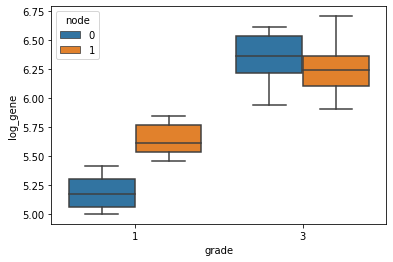

In [3]:
sns.boxplot(y="log_gene",x="grade",hue="node",data=gene_table)

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'log_gene ~ C(grade) + C(node) + C(grade):C(node)'
lm = ols(formula, gene_table).fit()
#print(lm.summary())
print(anova_lm(lm))

                    df    sum_sq   mean_sq          F        PR(>F)
C(grade)           1.0  4.724248  4.724248  98.180646  3.691090e-09
C(node)            1.0  0.210704  0.210704   4.378918  4.934337e-02
C(grade):C(node)   1.0  0.432580  0.432580   8.989996  7.102512e-03
Residual          20.0  0.962358  0.048118        NaN           NaN


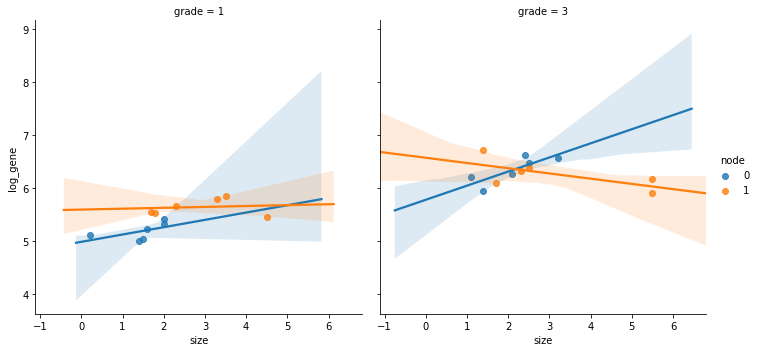

In [5]:
sns.lmplot(y="log_gene",x="size",hue="node",col="grade",data=gene_table)

In [6]:
formula = 'log_gene ~ C(grade) + C(node) + size'
lm2 = ols(formula, gene_table).fit()
print(anova_lm(lm2))

            df    sum_sq   mean_sq          F        PR(>F)
C(grade)   1.0  4.724248  4.724248  67.820058  7.427185e-08
C(node)    1.0  0.210704  0.210704   3.024817  9.736925e-02
size       1.0  0.001767  0.001767   0.025364  8.750601e-01
Residual  20.0  1.393171  0.069659        NaN           NaN


In [7]:
formula = 'log_gene ~ C(grade) + size + size:C(grade)'
lm3 = ols(formula, gene_table).fit()
print(anova_lm(lm3))

                 df    sum_sq   mean_sq          F        PR(>F)
C(grade)        1.0  4.724248  4.724248  81.016482  1.801068e-08
size            1.0  0.034664  0.034664   0.594460  4.497132e-01
size:C(grade)   1.0  0.404735  0.404735   6.940825  1.589141e-02
Residual       20.0  1.166244  0.058312        NaN           NaN
